# Part I - Communicate Data Findings: Analysing Prosper Loan Dataset
## by Adeyemo Oluwatosin M.

## Introduction
This document explores a dataset containing 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others.


## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import datetime as datetime

%matplotlib inline

In [2]:
# load data
loan_data = pd.read_csv('prosperLoanData.csv')
loan_data.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
loan_data.shape

(113937, 81)

- The dataset has 113937 rows and 81 columns

In [4]:
loan_data.columns

Index(['ListingKey', 'ListingNumber', 'ListingCreationDate', 'CreditGrade',
       'Term', 'LoanStatus', 'ClosedDate', 'BorrowerAPR', 'BorrowerRate',
       'LenderYield', 'EstimatedEffectiveYield', 'EstimatedLoss',
       'EstimatedReturn', 'ProsperRating (numeric)', 'ProsperRating (Alpha)',
       'ProsperScore', 'ListingCategory (numeric)', 'BorrowerState',
       'Occupation', 'EmploymentStatus', 'EmploymentStatusDuration',
       'IsBorrowerHomeowner', 'CurrentlyInGroup', 'GroupKey',
       'DateCreditPulled', 'CreditScoreRangeLower', 'CreditScoreRangeUpper',
       'FirstRecordedCreditLine', 'CurrentCreditLines', 'OpenCreditLines',
       'TotalCreditLinespast7years', 'OpenRevolvingAccounts',
       'OpenRevolvingMonthlyPayment', 'InquiriesLast6Months', 'TotalInquiries',
       'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years',
       'PublicRecordsLast10Years', 'PublicRecordsLast12Months',
       'RevolvingCreditBalance', 'BankcardUtilization',
       'Availa

In [5]:
# I will select columns that I think will be relevant for the analysis
columns = ['EmploymentStatus', 'LoanOriginalAmount', 'TotalTrades', 'Occupation',
           'IsBorrowerHomeowner','TotalInquiries','BorrowerAPR', 'StatedMonthlyIncome', 
           'Term', 'IncomeRange','DebtToIncomeRatio', 'MonthlyLoanPayment']

loan_df = loan_data[columns]

In [6]:
loan_df.to_csv('loan_df.csv',index = False )

In [7]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   EmploymentStatus     111682 non-null  object 
 1   LoanOriginalAmount   113937 non-null  int64  
 2   TotalTrades          106393 non-null  float64
 3   Occupation           110349 non-null  object 
 4   IsBorrowerHomeowner  113937 non-null  bool   
 5   TotalInquiries       112778 non-null  float64
 6   BorrowerAPR          113912 non-null  float64
 7   StatedMonthlyIncome  113937 non-null  float64
 8   Term                 113937 non-null  int64  
 9   IncomeRange          113937 non-null  object 
 10  DebtToIncomeRatio    105383 non-null  float64
 11  MonthlyLoanPayment   113937 non-null  float64
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 9.7+ MB


In [8]:
# Check for duplicates
loan_df.duplicated().sum()

885

- The dataset has 885 duplicates. These duplicates will be removed

In [9]:
# Remove duplicates from dataset
loan_df.drop_duplicates(inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [10]:
loan_df.duplicated().sum()

0

In [11]:
# Check the percentage of missing data in each column
loan_df.isna().mean().round(4)*100

EmploymentStatus       1.99
LoanOriginalAmount     0.00
TotalTrades            6.67
Occupation             3.12
IsBorrowerHomeowner    0.00
TotalInquiries         1.03
BorrowerAPR            0.02
StatedMonthlyIncome    0.00
Term                   0.00
IncomeRange            0.00
DebtToIncomeRatio      7.48
MonthlyLoanPayment     0.00
dtype: float64

In [12]:
# Drop null values
loan_df.dropna(inplace=True)

In [13]:
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 95896 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   EmploymentStatus     95896 non-null  object 
 1   LoanOriginalAmount   95896 non-null  int64  
 2   TotalTrades          95896 non-null  float64
 3   Occupation           95896 non-null  object 
 4   IsBorrowerHomeowner  95896 non-null  bool   
 5   TotalInquiries       95896 non-null  float64
 6   BorrowerAPR          95896 non-null  float64
 7   StatedMonthlyIncome  95896 non-null  float64
 8   Term                 95896 non-null  int64  
 9   IncomeRange          95896 non-null  object 
 10  DebtToIncomeRatio    95896 non-null  float64
 11  MonthlyLoanPayment   95896 non-null  float64
dtypes: bool(1), float64(6), int64(2), object(3)
memory usage: 8.9+ MB


- The dataset has been reduced to 95896 rows and 13 columns

In [14]:
loan_df.describe()

,LoanOriginalAmount,TotalTrades,TotalInquiries,BorrowerAPR,StatedMonthlyIncome,Term,DebtToIncomeRatio,MonthlyLoanPayment
count,95896.000000,95896.000000,95896.000000,95896.000000,95896.000000,95896.000000,95896.000000,95896.000000
mean,8684.907358,23.414397,5.366605,0.217737,5741.833702,41.302995,0.275765,281.241572
std,6363.020453,11.890177,5.804728,0.080374,4930.971597,10.777279,0.529656,194.304282
min,1000.000000,0.000000,0.000000,0.006530,0.000000,12.000000,0.000000,0.000000
25%,4000.000000,15.000000,2.000000,0.154520,3333.333333,36.000000,0.150000,138.840000
50%,7000.000000,22.000000,4.000000,0.207350,4866.666667,36.000000,0.220000,232.130000
75%,12500.000000,30.000000,7.000000,0.280780,7000.000000,36.000000,0.320000,379.320000
max,35000.000000,126.000000,158.000000,0.423950,483333.333333,60.000000,10.010000,2251.510000


### Observations
1. The average monthly income at the time of listing is $6002. The mean is greater than the median which means that the data is positively skewed. This implies that most of the people who applied for loans have relatively small monthly income.

2. The mean and median of borrower APR is relatively the same. This means that it is normally distributed.

3. For all the variables described above except BorrowerAPR, the maximum value is relatively larger than the 75 percentile. This indicates the likelihood of there been an outlier in the variables

In [15]:
loan_df.columns

Index(['EmploymentStatus', 'LoanOriginalAmount', 'TotalTrades', 'Occupation',
       'IsBorrowerHomeowner', 'TotalInquiries', 'BorrowerAPR',
       'StatedMonthlyIncome', 'Term', 'IncomeRange', 'DebtToIncomeRatio',
       'MonthlyLoanPayment'],
      dtype='object')

### What is the structure of your dataset?

> The dataset has 113937 rows and 81 columns (features)

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest are the ones that would help in predicting the borrowers' Annual Percentage Rate (APR) for the loans and in which way the employment status, and debtToIncome ratio are connected with different metrics in the dataset.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The borrowers stated monthly income, loan term, Prosper rating and employment status. Moreover, Employment status and occupation would have an impact on the ProsperRating and loan Amount.

## Univariate Exploration

In [94]:
#funtion to plot a labeled histogram

def histogram(feature, Bins):
    '''
    The histogram function has two  parameters:
    feature: the variable of interest to plot
    Bins: set the bins of the histogram
    '''
    loan_df[feature].hist(figsize = (8, 8), color = 'green', bins = Bins)
    plt.axvline(x = loan_df[feature].mean(), color = 'red')
    name = str()
    plt.title('Distribution of {}'.format(loan_df[[feature]].columns[0]))
    plt.xlabel(loan_df[[feature]].columns[0])
    plt.ylabel('Frequency')

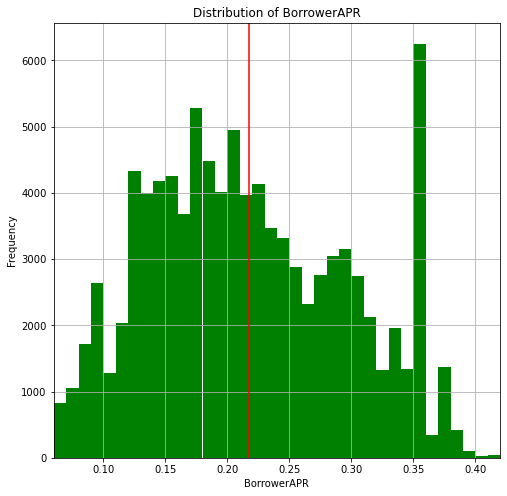

In [95]:
Binsize = np.arange(0, loan_df['BorrowerAPR'].max()+0.01, 0.01)
histogram('BorrowerAPR', Binsize)
plt.xlim(0.06, 0.42);

- The majority of borrowers receive an APR of about 0.22

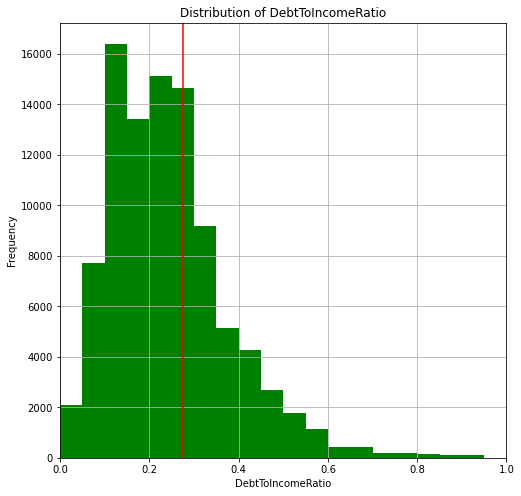

In [96]:
# Visualize the distribution of debt to income ratio
Binsize = np.arange(0,1, 0.05)
histogram('DebtToIncomeRatio', Binsize)
plt.xlim(0, 1);

- The average debt to income ratio is about 0.25 which is 1:4. This implies that the income of most borrowers is times 4 of their debt.

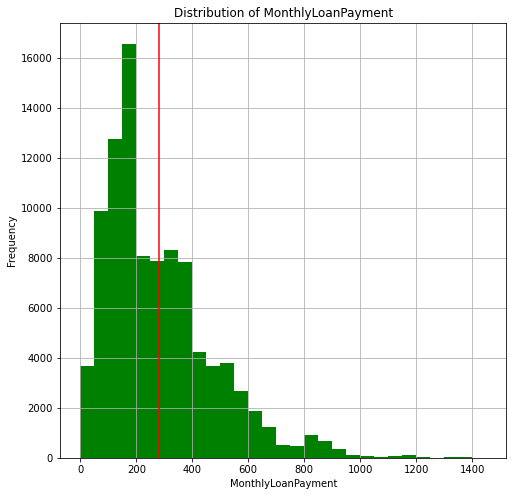

In [97]:
# Check the distribution of monthly loan payment
Binsize = np.arange(0,1500, 50)
histogram('MonthlyLoanPayment', Binsize)

- The distribution of monthly loan payment is right skewed with a mean of about 300. This shows that majority of the borrowers make a monthly loan payment that is less than 400

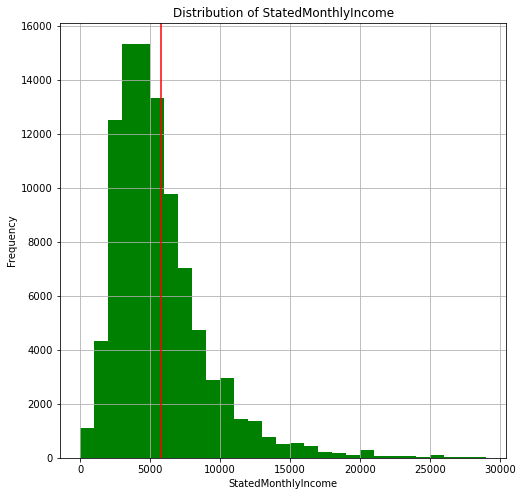

In [98]:
# Visualize the distribution of the stated monthly income
Binsize = np.arange(0,30000, 1000)
histogram('StatedMonthlyIncome', Binsize)

- The distribution is skewed to the right too implying that few of the borrowers has a monthly income that is greater than 10000 while majority has an income of about 6000.

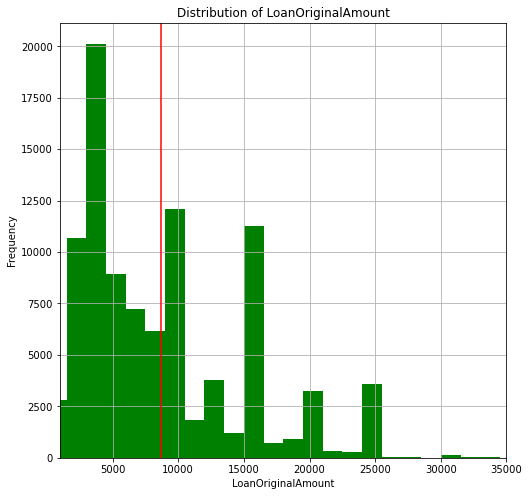

In [99]:
# Visualize the distribution of the Loan original amount
Binsize = np.arange(0,35000, 1500)
histogram('LoanOriginalAmount', Binsize)
plt.xlim(1000, 35000);

- The distribution is skewed to the right too implying that most of the borrowers took a loan that is below 10000

**What occupation is most common amongst the borrowers?**

In [21]:
occupation = loan_df['Occupation'].value_counts()[9::-1].sort_values(ascending = False)
occupation

Other                       23630
Professional                12261
Computer Programmer          3961
Executive                    3836
Teacher                      3452
Analyst                      3369
Administrative Assistant     3368
Accountant/CPA               2924
Clerical                     2767
Sales - Commission           2740
Name: Occupation, dtype: int64

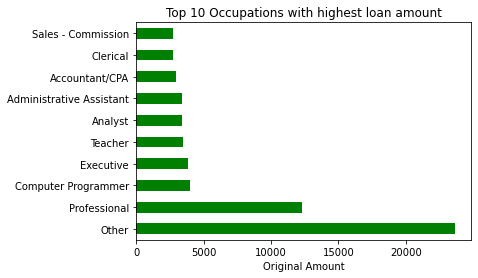

In [22]:
occupation.plot(kind = "barh", color = 'green')
plt.xlabel('Original Amount')
plt.title('Top 10 Occupations with highest loan amount')
plt.figsize=(8, 5);

- The plot shows that most of the borrowers chose to hide their profession by choosing Executive, Professional and Other which does not really detail any occupation. Aside that, the most common occupations are computer programmer, teacher and analyst.

**What is the employment status of borrowers?**

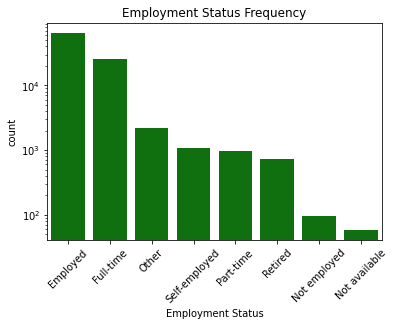

In [23]:
# Plot the Employment Status 
type_order = loan_df['EmploymentStatus'].value_counts().index
sns.countplot(data=loan_df, x='EmploymentStatus', color='green', order=type_order);
plt.xticks(rotation = 45);
plt.xlabel('Employment Status');
plt.title('Employment Status Frequency')
plt.yscale('log');

- It seems all of the borrowers are earners one way or another, although a very small percentage are not employed. It makes sense to give loan to people who are working except in rare cases.

**Does owning a house influence the probability of securing a loan?**

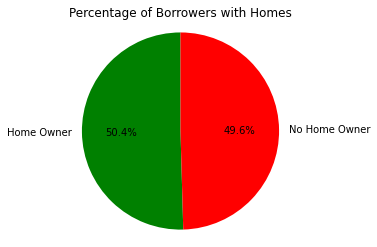

In [24]:
labels = 'Home Owner', 'No Home Owner'
sorted_counts = loan_data['IsBorrowerHomeowner'].value_counts()
plt.pie(sorted_counts, labels = labels, startangle= 90, autopct='%1.1f%%', colors = 'green')
plt.axis('square')
plt.title('Percentage of Borrowers with Homes');

- It seems owning a home does not really matter as there does not seem to be much difference in their percentages

**What period term does most borrowers sign up for?**

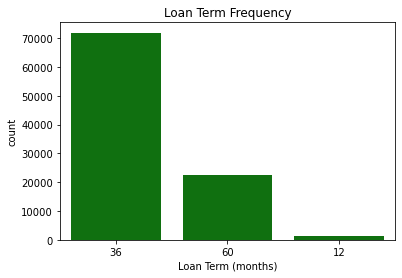

In [25]:
# Plot the Term 
type_order = loan_df['Term'].value_counts().index
sns.countplot(data=loan_df, x='Term', color="green", order=type_order);
plt.xlabel('Loan Term (months)');
plt.title('Loan Term Frequency');

- The term of most of the loans is 3 years (36 months).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The BorrowerAPR is quite normally distributed while that of `DebtToIncomeratio`, `StatedMonthlyIncome` and `MonthlyLoanPayment` where skewed to the right.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> There were no unusual distribution. However I did a log transformation on `EmploymentStatus` because most of the borrowers were employed and if visualized without transformation, part time, self employed and not employed will not be displayed.

## Bivariate Exploration



**Is there a relationship between loan original amount and BorrowerAPR?**

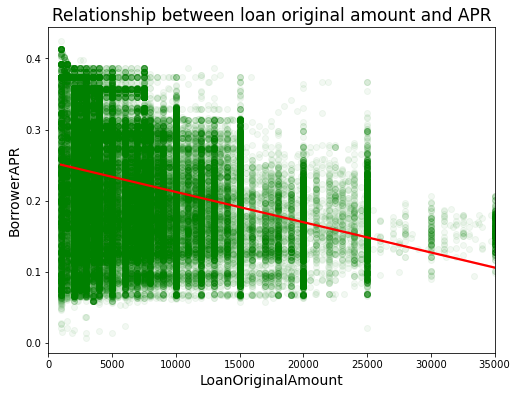

In [26]:
plt.figure(figsize = [8, 6])
sns.regplot(data = loan_df, x = 'LoanOriginalAmount', y = 'BorrowerAPR', color = 'green',
            scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})
plt.xlim(0, 35000)
plt.title("Relationship between loan original amount and APR", fontsize = 17)
plt.xlabel("LoanOriginalAmount", fontsize = 14)
plt.ylabel("BorrowerAPR", fontsize = 14);

- There is a negative correlation between the borrowers' APR and origination amount. The higher the origination amount, the smaller the APR

**Is there a relationship between monthly loan payment and BorrowerAPR?**

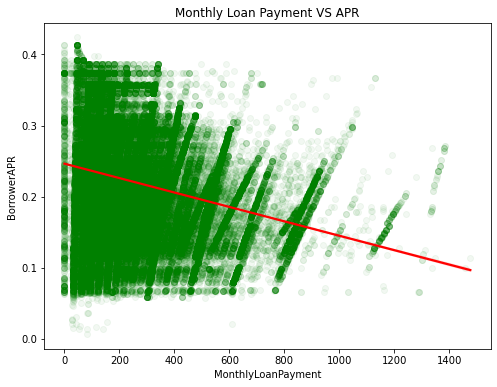

In [27]:
plt.figure(figsize = [8, 6])
df = loan_df.query('MonthlyLoanPayment < 1500')
sns.regplot(data = df, x = 'MonthlyLoanPayment', y = 'BorrowerAPR', color ='green',
            scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})
plt.title("Monthly Loan Payment VS APR");

- There is also a negative correlation between monthly loan payment and borrower APR

**Is there a relationship between stated monthly income and BorrowerAPR?**

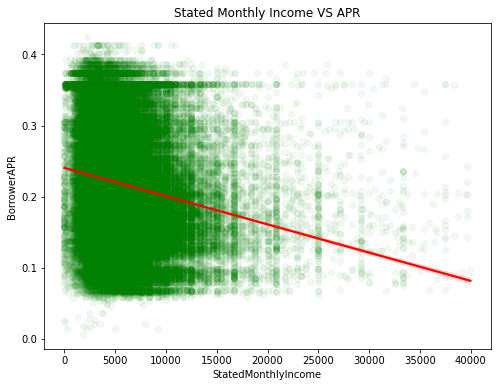

In [28]:
plt.figure(figsize = [8, 6])
df = loan_df.query('StatedMonthlyIncome < 40000')
sns.regplot(data = df, x = 'StatedMonthlyIncome', y = 'BorrowerAPR', color ='green',
            scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})
plt.title("Stated Monthly Income VS APR");

- There is also a negative correlation between stated monthly income and borrower APR

**Does monthly income has any effect on the amount of loan secured by borrowers?**

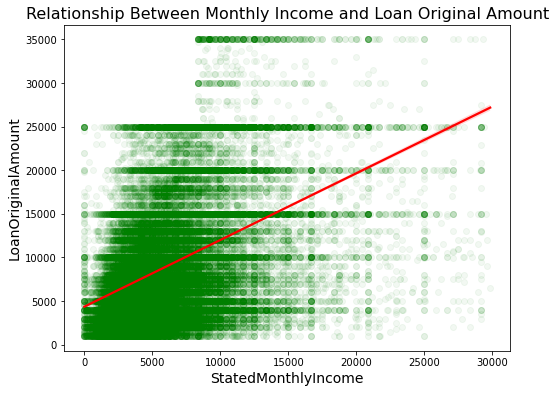

In [29]:
plt.figure(figsize = [8, 6])
df = loan_df.query('StatedMonthlyIncome < 30000')
sns.regplot(data = df, x = 'StatedMonthlyIncome', y='LoanOriginalAmount', color ='green',
            scatter_kws={'alpha':0.05}, line_kws={'color': 'red'})
plt.xlabel("StatedMonthlyIncome", fontsize = 14)
plt.ylabel("LoanOriginalAmount", fontsize = 14)
plt.title("Relationship Between Monthly Income and Loan Original Amount", fontsize = 16);

- It seems monthly income of a borrower influences the amount of loan secured. The higher the monthly income, the higher the amount of loan secured

**What is the relationship between the original amount loaned and term?**

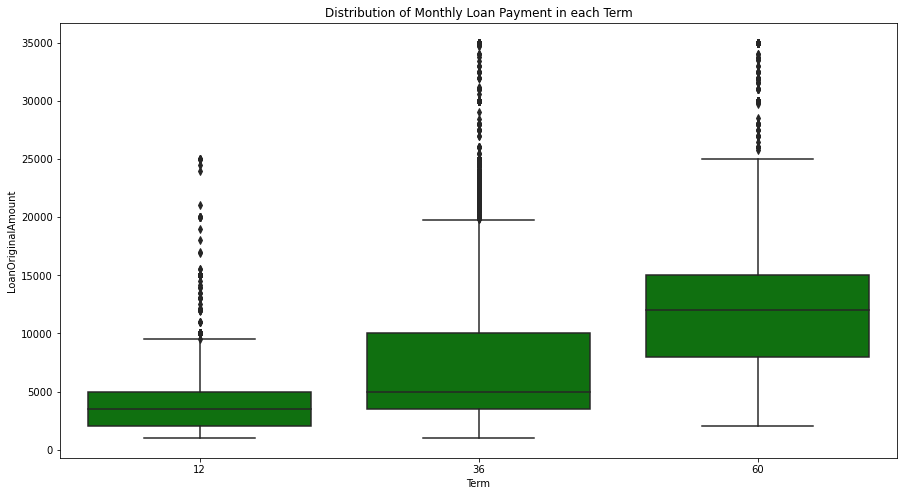

In [30]:
plt.figure(figsize=[15,8])
sns.boxplot(data=loan_df, x='Term', y='LoanOriginalAmount', color='green')
plt.title('Distribution of Monthly Loan Payment in each Term');

- The figure above shows that the higher the original amount loaned, the longer the term. 

**Does monthly income affect the term of loan?**

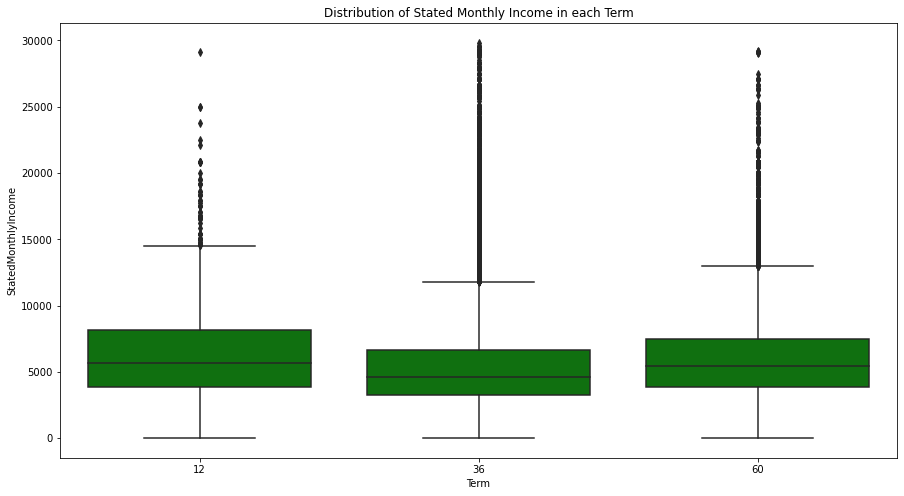

In [31]:
plt.figure(figsize=[15,8])
df = loan_df.query('StatedMonthlyIncome < 30000')
sns.boxplot(data=df, x='Term', y='StatedMonthlyIncome', color='green')
plt.title('Distribution of Stated Monthly Income in each Term');

- Monthly income does not seem to affect the term of loan

**overall, what occupation(s) do those who borrow the highest amount does?**

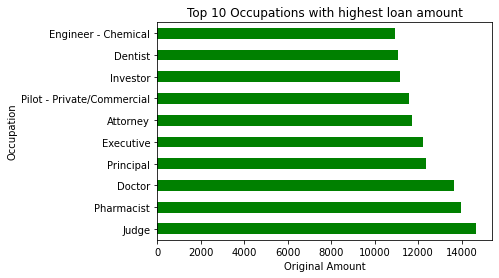

In [32]:
top_occupation = loan_df.groupby('Occupation').LoanOriginalAmount.mean().sort_values(ascending = False)[:10]
top_occupation.plot(kind = "barh", color = 'green')
plt.xlabel('Original Amount')
plt.title('Top 10 Occupations with highest loan amount')
plt.figsize=(8, 5);

- Most of the borrowers with the highest origination amount of loan are judges, pharmacists and doctors

**overall, what occupation(s) do those who borrow the least amount does?**

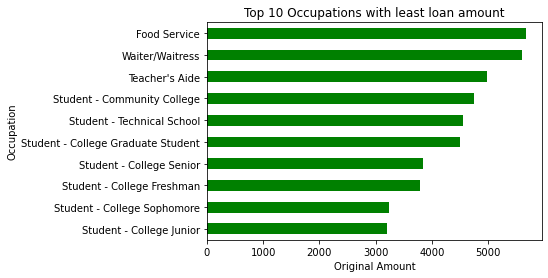

In [33]:
least_occupation = loan_df.groupby('Occupation').LoanOriginalAmount.mean().sort_values()[:10]
least_occupation.plot(kind = "barh", color = 'green')
plt.xlabel('Original Amount')
plt.title('Top 10 Occupations with least loan amount')
plt.figsize=(8, 5);

- Those with the least origination amount of loan are students, teacher's aides, waiters/waitresses and those who render food services.

**What is the relationship between employment and homeownership status of borrowers and loan term?**

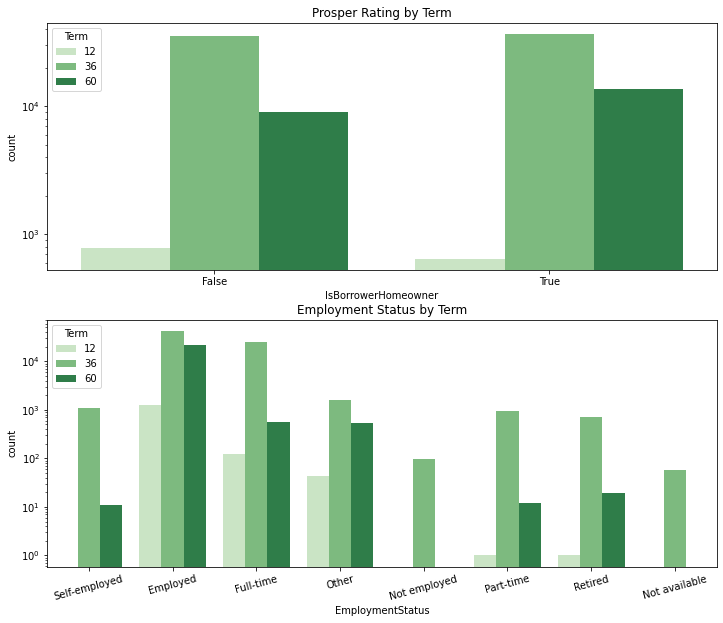

In [34]:
plt.figure(figsize = [12, 10])

# subplot 1: Prosper rating by term
plt.subplot(2, 1, 1)
sns.countplot(data = loan_df, x = 'IsBorrowerHomeowner', hue = 'Term', palette = 'Greens')
plt.title('Prosper Rating by Term')
plt.yscale('log')

# subplot 2: employment status by term
ax = plt.subplot(2, 1, 2)
sns.countplot(data = loan_df, x = 'EmploymentStatus', hue = 'Term', palette = 'Greens')
plt.xticks(rotation = 15)
plt.title('Employment Status by Term')
plt.yscale('log');

- There is not a significant difference between homeownership status and term of loans. However, those who own a home borrow for a longer term compared to does who does not

- Overall, those who have a source of income take up loans for a longer period whereas those that are not employed or unavailable take up loans for a period of 3 years

- No self-employed person took a loan of 1 year. And in all groups, majority take a loan of 3 years term

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>The lower the Loan Origination Amount, the higher the APR. There is also a negative correlation between APR and monthly loan payment as well as the stated salary amount.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Looking at the occupation of borrowers, most of the borrowers with the highest origination amount of loan are judges, pharmacists and doctors while those with the least origination amount of loan are students, teacher's aides, waiters/waitresses and those who render food services.

> There is no significant difference between homeownership status and term of loans. However, those who own a home borrow for a longer term compared to does who does not. Overall, those who have a source of income take up loans for a longer period whereas those that are not employed or unavailable take up loans for a period of 3 years. No self-employed person took a loan of 1 year. And in all groups, majority take a loan of 3 years term

## Multivariate Exploration



**What is the effect of income range and homeownership on borrower APR?**

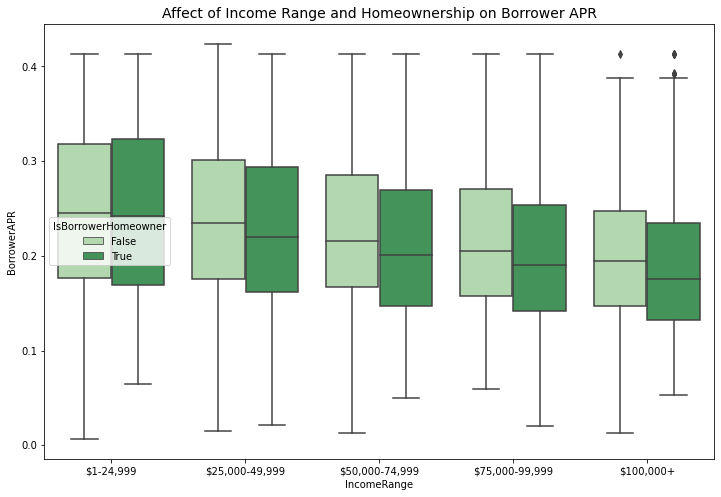

In [35]:
plt.figure(figsize = [12, 8])
ax = sns.boxplot(x="IncomeRange", y="BorrowerAPR", hue="IsBorrowerHomeowner", palette = 'Greens',
                 data = loan_df, order=["$1-24,999", "$25,000-49,999", "$50,000-74,999", 
                                        "$75,000-99,999", "$100,000+"])
plt.title('Affect of Income Range and Homeownership on Borrower APR', fontsize=14);

- The income range of 1-24,999 has a higher APR for homeowners than those who does not own a home.Starting at the 25,000 income range, APR is less for homeowners than their counterpart.

### Assess the correlation of all the numerical variables

In [36]:
num_cols = ['LoanOriginalAmount', 'TotalTrades', 'BorrowerAPR', 'StatedMonthlyIncome',
            'DebtToIncomeRatio', 'TotalInquiries', 'Term', 'MonthlyLoanPayment']

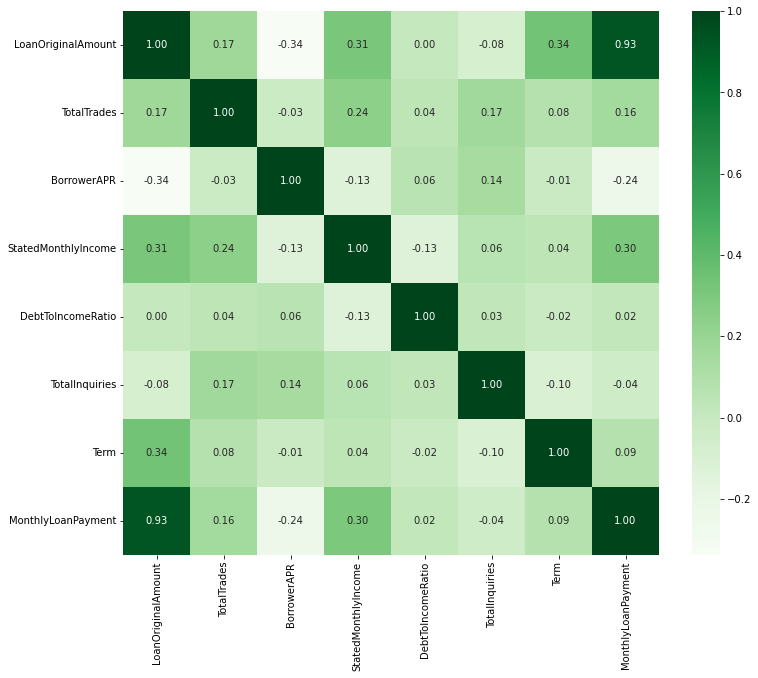

In [37]:
# correlation plot
plt.figure(figsize = [12, 10])
sns.heatmap(loan_df[num_cols].corr(), annot = True, 
            fmt = '.2f', cmap="Greens");

- There is no strong correlation among the features, except the monthly loan payment and loan original amount that has a very strong positive correlation (0.93)

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> There is no strong correlation among the features, except the monthly loan payment and loan original amount that has a very strong positive correlation (0.93)

### Were there any interesting or surprising interactions between features?

> There were no surprises between the features

## Conclusions

> The distribution of APR is unimodal at about 0.36 which means that majority of borrowers receive an APR of about 0.36. The average APR is about 0.22 while the distribution of loan origination amount is positively skewed and unimodal at about 3500 meaning that most of the borrowers took a loan that is below 10000 and most  collected a loan of about 3500. The average loan origination amount is about 8600. These two variables have a negative correlation. The higher the origination amount, the smaller the APR. 

> One of the key factor that influences the original amount of loan is monthly income. The higher the income, the higher the loan amount. Those with a higher original amount of loan have a longer loan term. For instance, borrowers of a loan that is more than 10000 are likely to pay back in 5 years while those below 5000 mostly pay back within a year.